
# Binary Classification with IMDB reviews dataset

## Two hidden layers



The goal is to classify movie reviews as positive or negative, based on the text content of the reviews. We will work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [ ]:
# imports
import tensorflow as tf
import numpy as np

In [ ]:
# Loading the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

The argument `num_words=10000` means you’ll only keep the top 10,000 most fre-
quently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

You can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors.

In [ ]:
# Encoding the integer sequences via multi-hot encoding

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize training and test labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

There are two key architecture decisions to be made about such a stack of Dense
layers:

*   How many layers to use
*   How many units to choose for each layer

The author suggest the following architecture:


*   Two intermediate layers with 16 units each
*   A third layer that will output the scalar prediction regarding the sentiment of the current review

In [ ]:
# Model definition

from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

The intermediate layers use `relu` as their activation function, and the final layer uses a `sigmoid` activation so as to output a probability.

Finally, you need to choose a loss function and an optimizer. Because you're facing a binary classification problem and the output of your model is a probability, it's best to use the `binary_crossentropy loss`.

As for the choice of the optimizer, we'll go with `rmsprop`, which is a usually a good default choice for virtually any problem.

In [ ]:
# Compiling the model

model.compile(
    optimizer="rmsprop",
    loss     ="binary_crossentropy",
    metrics  =["accuracy"]
)

In [ ]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train the model for 20 epochs (20 iterations over all samples in the training data) in mini-batches of 512 samples. At the same time, we will monitor loss and accuracy on the 10,000 samples that we set apart. We do so by passing the validation data as the `validation_data` argument.

In [ ]:
# Training your model

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5328 - accuracy: 0.7739 - val_loss: 0.4059 - val_accuracy: 0.8622
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3270 - accuracy: 0.8984 - val_loss: 0.3172 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 3s 94ms/step - loss: 0.2455 - accuracy: 0.9217 - val_loss: 0.2992 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1967 - accuracy: 0.9359 - val_loss: 0.2751 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1677 - accuracy: 0.9436 - val_loss: 0.2968 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1416 - accuracy: 0.9565 - val_loss: 0.2907 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1202 - accuracy: 0.9643 - val_loss: 0.2938 - val_accuracy: 0.8866
Epoch 8/20
30

Note that the call to `model.fit()` returns a History object, as you saw in chapter 3. This object has a member history, which is a dictionary containing data about everything that happened during training.

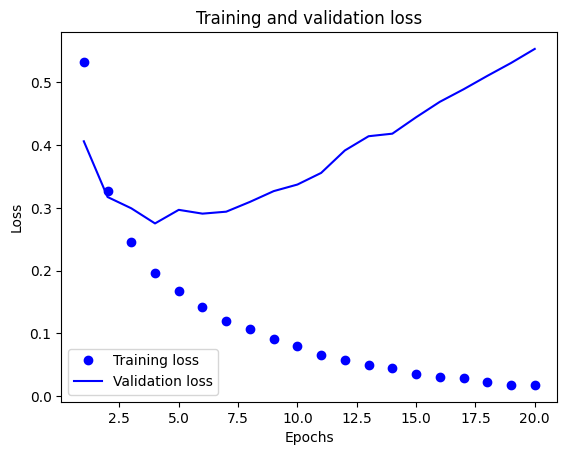

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

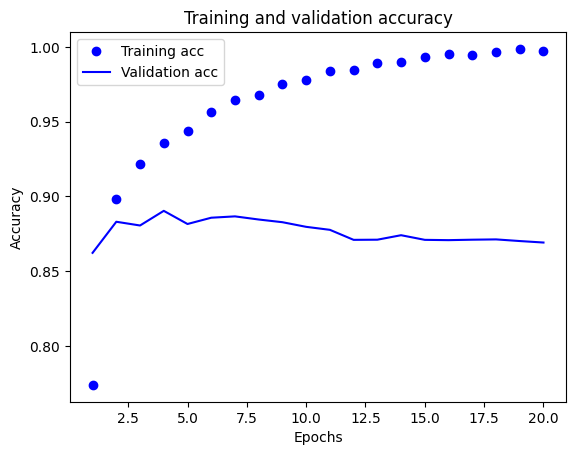

In [ ]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That's what you would expect when running gradient-descent optimization —the quantity you're trying to minimize should be less with every iteration. But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: **a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before**.

In [ ]:
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4595 - accuracy: 0.8206
Epoch 2/4
49/49 [==============================] - 2s 36ms/step - loss: 0.2717 - accuracy: 0.9030
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2152 - accuracy: 0.9237
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2857 - accuracy: 0.8874


[0.2856704294681549, 0.8873599767684937]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.22693725],
       [0.99993247],
       [0.8089058 ],
       ...,
       [0.11048336],
       [0.06901294],
       [0.7276303 ]], dtype=float32)